In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = (50,7)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('csv/flight.csv')
df.head()
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
nums = ['AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
        'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
        'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE', 'LOAD_TIME', 'GENDER','WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY','FFP_TIER']

In [ ]:
df[nums].describe()

,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [ ]:
df.FFP_TIER = np.where(df.FFP_TIER == 4, 'four',
                      np.where(df.FFP_TIER == 5, 'five',
                              np.where(df.FFP_TIER == 6, 'six','0')))

In [ ]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,LOAD_TIME,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,FFP_TIER
count,62988,62988,62988,62988,62985,60719,59740,62962,62988
unique,3068,3406,731,1,2,3234,1165,118,3
top,1/13/2011,2/16/2013,3/31/2014,3/31/2014,Male,guangzhou,guangdong,CN,four
freq,184,96,959,62988,48134,9386,17509,57748,58066


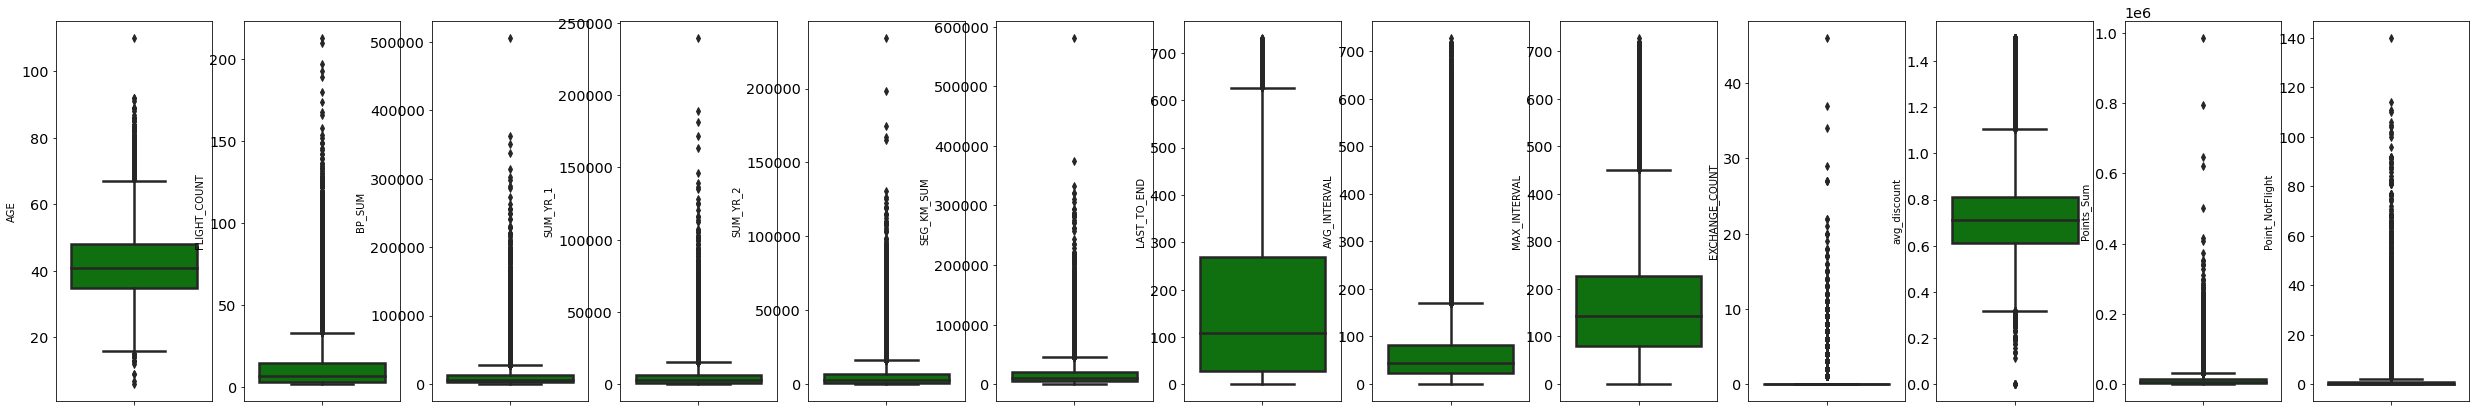

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features)+2, i+1)
    sns.boxplot(y=df[features[i]], color = 'green', orient = 'v')

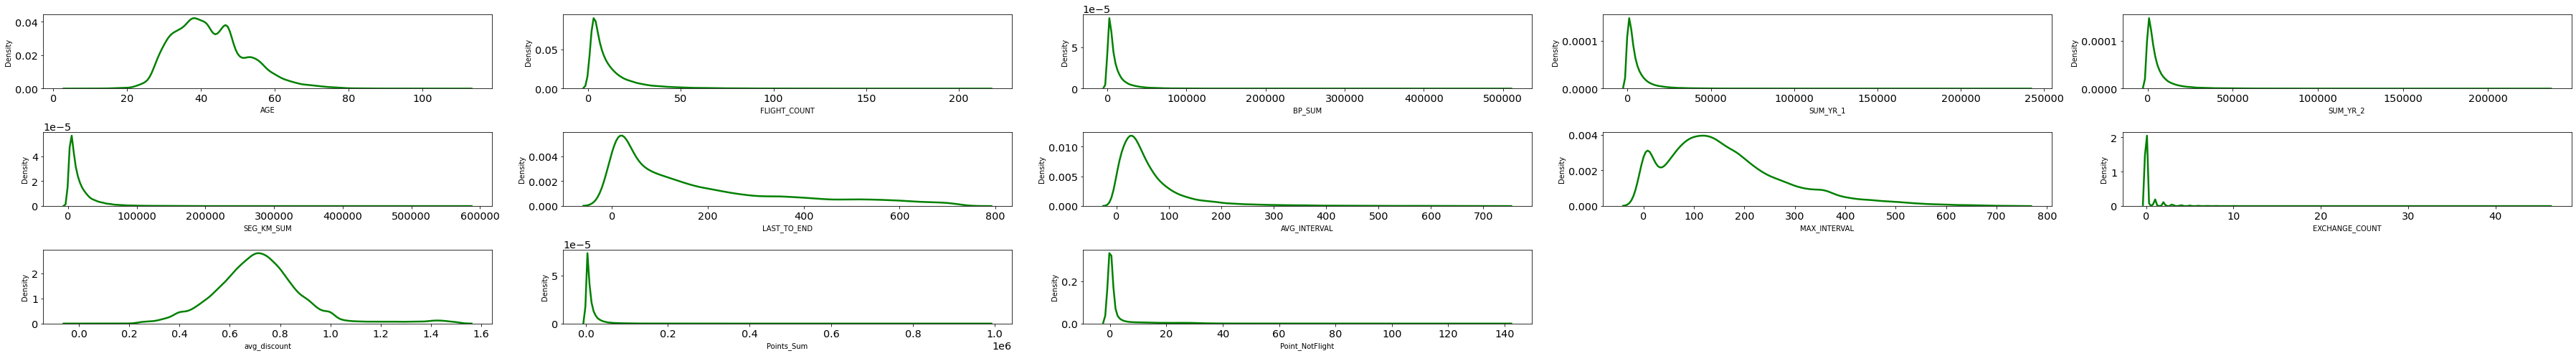

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

C:\Users\abyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65294 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\abyan\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 57385 missing from c

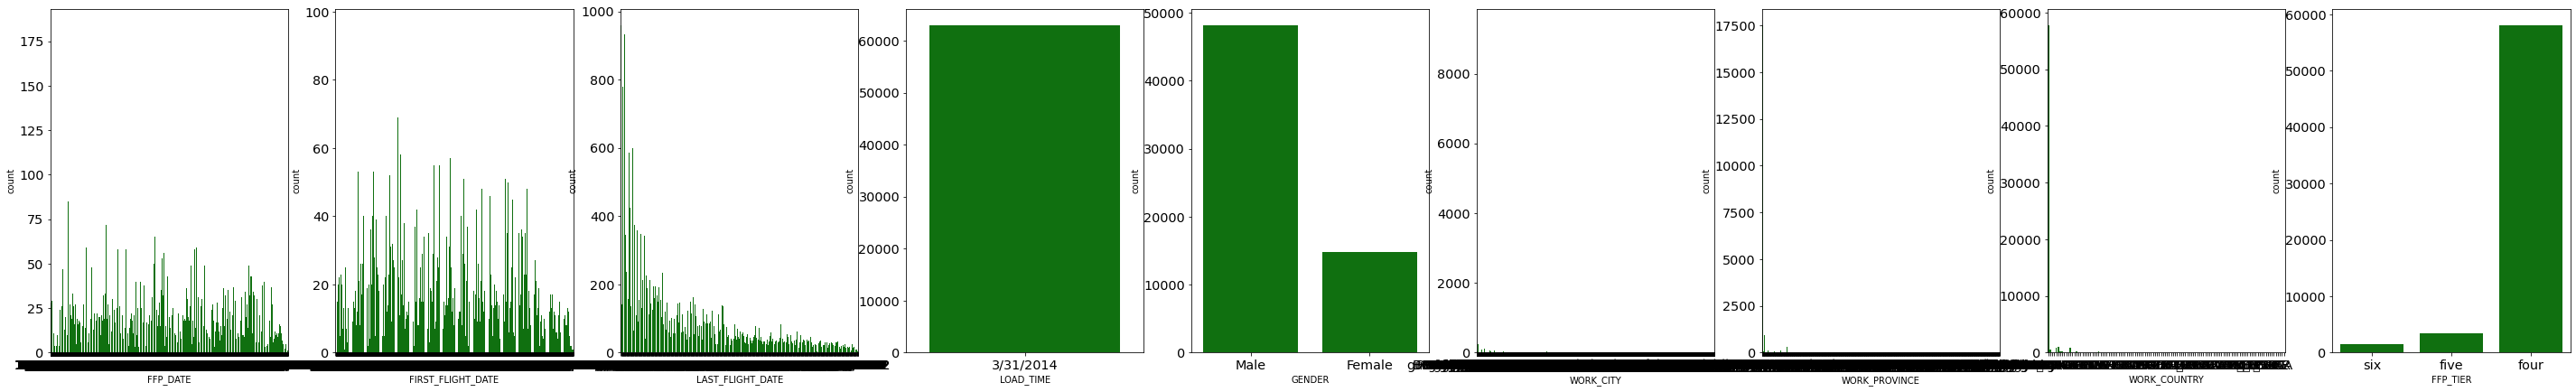

In [ ]:
features = cats
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color = 'green')

In [ ]:
df['GENDER'].fillna(df['GENDER'].mode(),inplace=True)

df['WORK_CITY'].fillna(df['WORK_CITY'].mode(),inplace=True)

df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode(),inplace=True)

df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode(),inplace=True)

df['SUM_YR_1'].fillna(df['SUM_YR_1'].median(),inplace=True)

df['SUM_YR_2'].fillna(df['SUM_YR_2'].median(),inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
features = nums
for i in df[features]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    df[i].loc[df[i] > high_limit] = high_limit
    df[i].loc[df[i] < low_limit] = low_limit

C:\Users\abyan\AppData\Local\Temp/ipykernel_11524/515866505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i] > high_limit] = high_limit
C:\Users\abyan\AppData\Local\Temp/ipykernel_11524/515866505.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].loc[df[i] < low_limit] = low_limit


In [ ]:
df.EXCHANGE_COUNT.unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
62983    0
62984    0
62985    0
62986    0
62987    0
Name: EXCHANGE_COUNT, Length: 62988, dtype: int64>

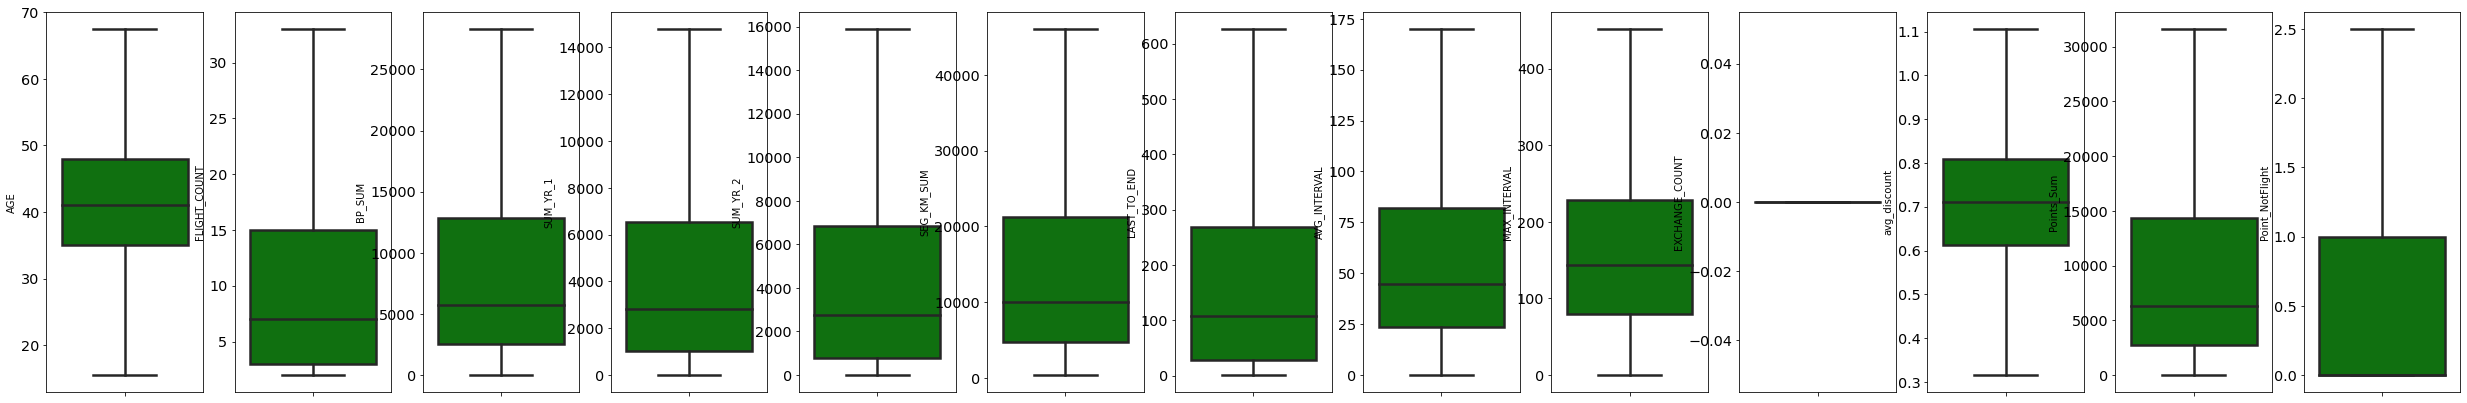

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features)+2, i+1)
    sns.boxplot(y=df[features[i]], color = 'green', orient = 'v')

In [ ]:
log = ['FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
        'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
        'Points_Sum', 'Point_NotFlight']
features = log
for i in df[features]:
    df[i] = np.log(df[i])

C:\Users\abyan\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\abyan\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


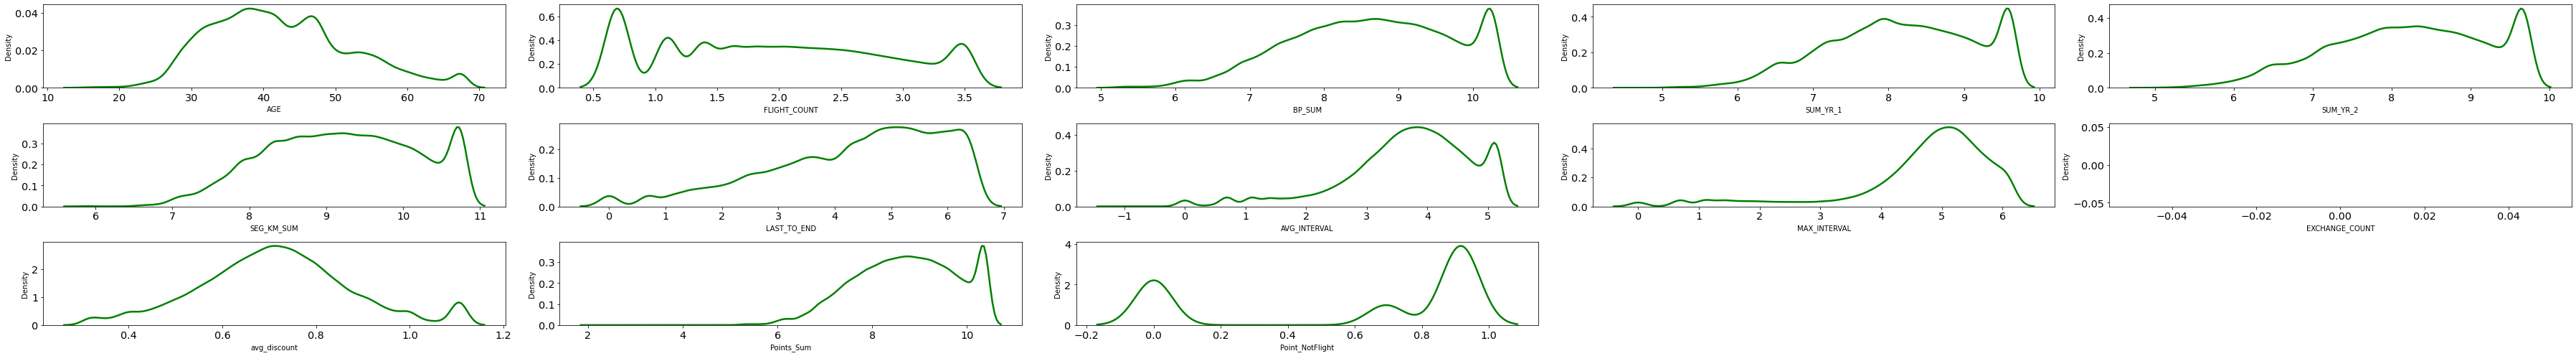

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
from sklearn.preprocessing import StandardScaler
features = log
for i in df[features]:
    df[i] = StandardScaler().fit_transform(df[i].values.reshape(len(df),1))

ValueError: Input contains infinity or a value too large for dtype('float64').

C:\Users\abyan\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


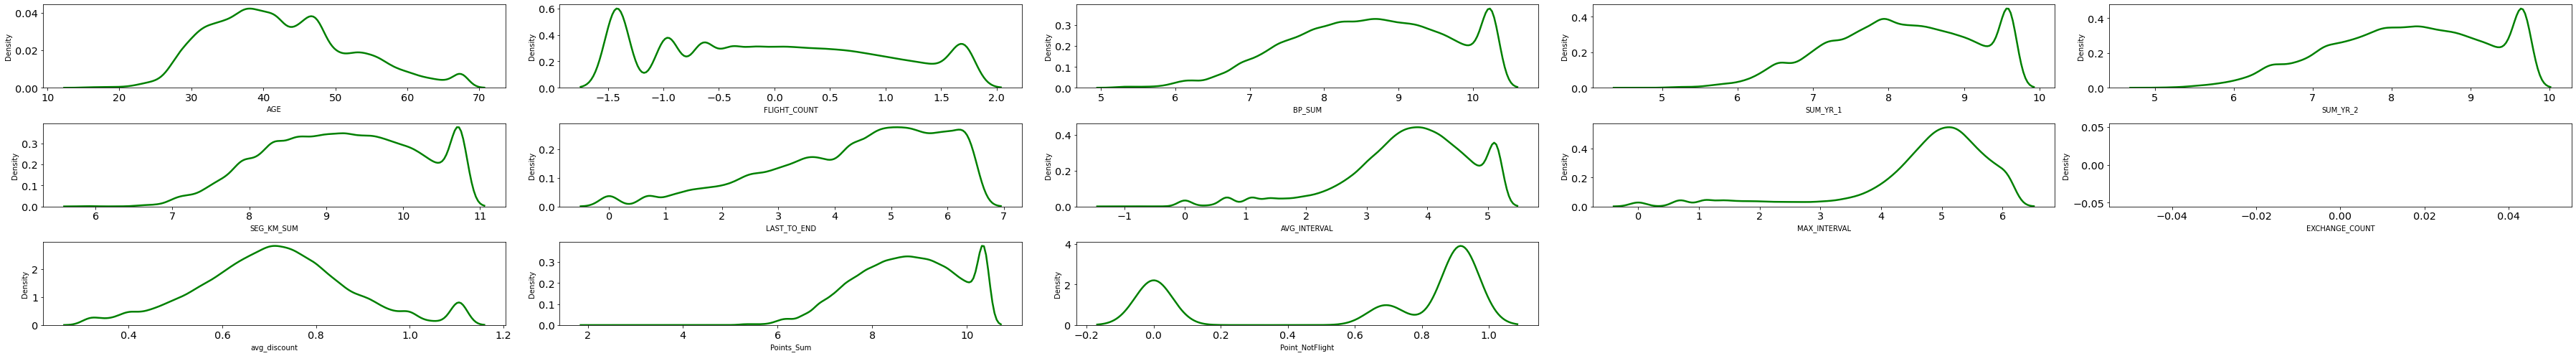

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[features[i]], color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()